Before starting working on this Python lab, install the following library with this command


In [3]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
from IPython.display import Image
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In this quick notebook, we will be dicussing Bayesian Statisitcs over Bayesian Networks and Inferencing them using Pgmpy Python library.
Bayesian statistics is a theory in the field of statistics based on the Bayesian interpretation of probability where probability expresses a degree of belief in an event, which can change as new information is gathered, rather than a fixed value based upon frequency or propensity.Bayesian statistical methods use Bayes' theorem to compute and update probabilities after obtaining new data. Bayes' theorem describes the conditional probability of an event based on data as well as prior information or beliefs about the event or conditions related to the event.

# Bayes' theorem
Bayes' theorem is a fundamental theorem in Bayesian statistics, as it is used by Bayesian methods to update probabilities, which are degrees of belief, after obtaining new data. Given two events A and B, the conditional probability of A given that B is true is expressed as follows:
$$P(A\mid B) = \frac{P(B\mid A)P(A)}{P(B)}$$

The probability of the evidence P(B) can be calculated using the law of total probability. If 
$$A = \{ A_{1}, A_{2}, \dots, A_{n} \}$$
is a partition of the sample space, which is the set of all outcomes of an experiment, then:
$$P(B) = P(B\mid A_{1})P(A_{1})P(B\mid A_{2})P(A_{2})+\dots + P(B\mid A_{n})P(A_{n}) = \sum_{i}P(B\mid A_{i})P(A_{i}) $$

# Bayesian network
A Bayesian network is a probabilistic graphical model (a type of statistical model) that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 


# Example
### Statistical moderator for social platform with a given information such as user history, ML model prediction, other user flagging the content, etc.
We can use bayes rule and total probability theorem to infer probabilites in a bayes network. Lets take an example:

Example
Lets consider an example, where a social media website wish to moderate content on the site and suspends bad user accounts. For this they would like us to create a statistical moderator that can take the preemtive measure based on information given. Lets assume we have following information:
* M : A prediction from a ML model that can read the content and give a score (probability) that this content should be flagged.
* U :  Another User flags the content.
* B : The account was suspended before for any bad content.
* R : Score (Probability) that the content should be removed from the platform.
* S : Score (Probability) that account should be suspended

Lets assume probabilities are given to us for the network as follows:

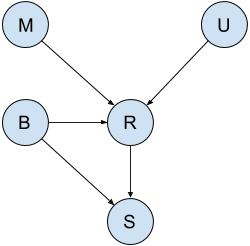

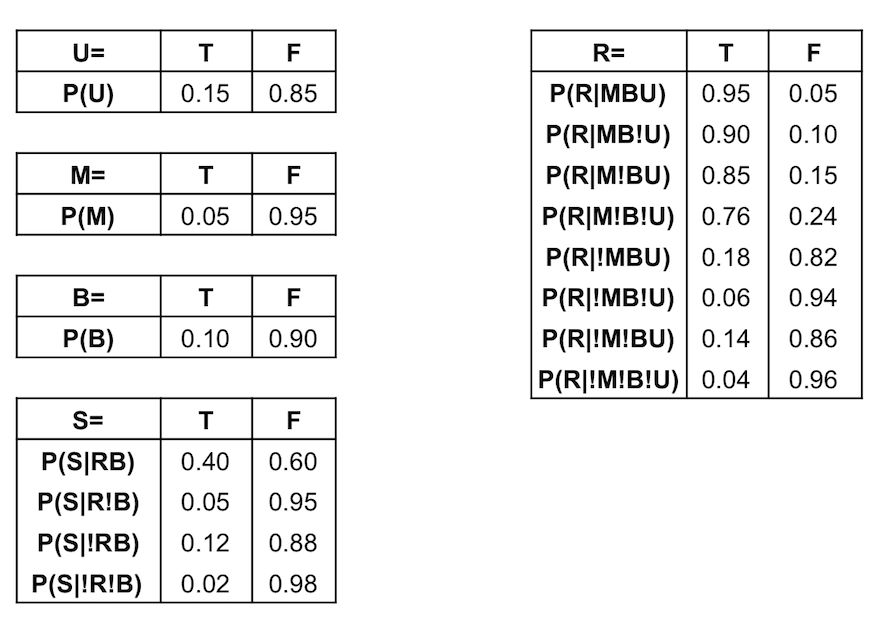

Create Bayesian network and corresponding conditional probabilities and check if model is correct.

In [17]:
model = BayesianModel([('U','R'),('M','R'),('B','R'),('B','S'),('R','S')])
model.add_nodes_from(['U','R','M','B','S'])
cpd_U = TabularCPD(variable='U', variable_card=2, values=[[0.15], [0.85]])
cpd_M = TabularCPD(variable='M', variable_card=2, values=[[0.05], [0.95]])
cpd_B = TabularCPD(variable='B', variable_card=2, values=[[0.10], [0.90]])
cpd_S = TabularCPD(
    variable='S', 
    variable_card=2, 
    values=[[0.40, 0.05, 0.12, 0.02], [0.60, 0.95, 0.88, 0.98]],
     evidence=['R','B'],
     evidence_card=[2, 2])
cpd_R = TabularCPD(
    variable='R',
    variable_card=2, 
    values=[[0.95, 0.90, 0.85, 0.76, 0.18, 0.06, 0.14, 0.04], [0.05, 0.10, 0.15,0.24,0.82,0.94,0.86,0.96]],
    evidence=['M','B','U'],
    evidence_card=[2, 2, 2]
     )

model.add_cpds(cpd_U,cpd_M,cpd_B,cpd_S,cpd_R)
model.check_model()


True

Find the following proabilities using pgmpy
1. Content should be removed from the platform, i.e., $P(R)$
2. Content should be removed from platform given our ML model flags it, i.e., $P(R|M)$.

Check the outputs with your manual calculation.

Investigate at least two features in pgmpy that you find interesting, e.g., check dependencies between the variables, etc.

## Markov random fields

### Image denoising with Ising model

Text(0.5, 1.0, 'True binary image')

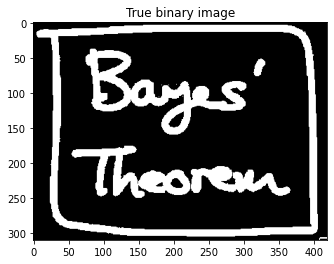

In [2]:
#load image data
data = Image.open('bayes.bmp')
temp = np.double(data)
temp_mean = np.mean(data)
clean_img = +1*(temp>temp_mean) + -1*(temp<temp_mean)

plt.figure()
plt.imshow(clean_img,cmap='Greys')
plt.title("True binary image")

310 419


Text(0.5, 1.0, 'observed noisy image')

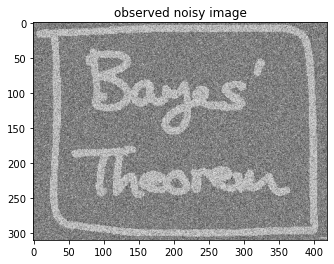

In [3]:
height,width = clean_img.shape
print(height,width)
sigma  = 1  #noise level
noisy_img = clean_img + sigma*np.random.randn(height, width)
plt.figure()
plt.imshow(noisy_img, cmap='Greys')
plt.title("observed noisy image")

Implement Ising model to denoise noisy image. Here, the objective is minimizing the following energy function using iterated conditional method.
$$ E(x,y) = h\sum_{i}x_{i} - \beta\sum_{i,j}x_{i}x_{j}-\eta\sum_{i}x_{i}y_{i} $$


iterated conditional method:

initialization: $x_{i}=y_{i}$ for all $i$

For $j = 1, . . . ,N$
  1. Evaluate total energy for states $x_{j} = +1$ and $x_{j} = −1$ keeping all other variables fixed.
      Set $x_{j}$ to state with lower energy.
  2. Repeat 1 until convergence or stopping criterion.
  
  
 Comapre denoised image with the original image.

Try different noise levels and plot the normalized mean squared error (NMSE) vs noise level.
NMSE is defined as following
$$ NMSE = \frac{|D-G|^{2}}{|G|^2} $$
Here, $D$ is the denoised image and $G$ is the ground truth or clean image.

Try different parameters in the energy function, e.g., $ h, \beta, \eta$, and  plot the following figures.
1. NMSE vs $ h$
2. NMSE vs $ \beta$
3. NMSE vs $ \eta$